<a href="https://colab.research.google.com/github/jdeversdev/Data-Analytics-WGU/blob/master/D208_JD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Research Question

**A1.** How do medical conditions (High Blood Pressure, Diabetes, Overweight), demographic factors (Age, Gender), and their interactions influence the total charges for a patient's hospital visit?

**A2.**

Goals of Data Analysis:
1. **Identify Key Factors:** Examine how HighBlood, Diabetes, Overweight, Age, and Gender impact hospital charges (TotalCharge) in the dataset.

2. **Create a Useful Model:** Build a simple model using these factors to predict how much a patient might be charged for their hospital visit.

3. **Check Model Accuracy:** Make sure the model is good at predicting charges by testing it with the available data.

4. **Provide Practical Insights:** Generate valuable information for decision making.

5. **Keep It Simple:** Aim for a model that's easy to understand, making it practical for real-world use in an organization.

# Part II: Method Justification

**B1.**

### **Four Assumptions of Multiple Linear Regression:**

1. **Linearity:** The model assumes that the relationship between predictors and the response variable is linear. Any deviation from this linearity can lead to biased predictions.

2. **Independence:** The residuals (prediction errors) should be independent of each other. This ensures that the model's predictions are not influenced by the order of data points.

3. **Homoscedasticity:** The spread of residuals should be consistent across all levels of predictors. If the spread varies, it can affect the model's accuracy at different predictor levels.

4. **Normality of Residuals:** The residuals should follow a normal distribution, indicating that errors are normally distributed. This is crucial for reliable statistical testing and confidence interval estimation.


---



---



**B2.** In this analysis, Python proves invaluable with its user-friendly syntax, facilitating efficient coding and collaboration. The rich ecosystem of data science libraries like Pandas and Scikit-learn empowers tasks such as data manipulation and machine learning.



---



---

**B3.** Multiple linear regression is suitable for our analysis as it allows us to assess the simultaneous influence of multiple independent variables, such as age, gender, and various medical conditions, on the dependent variable TotalCharge. This technique enables us to quantify the relationships and understand the combined impact of these factors on hospital charges.


# Part III: Data Preparation

**C1.**

**Data Cleaning Goals and Steps:**

**1. Handling Missing Values:**
   - *Goal:* Ensure completeness in the dataset by addressing missing values.
   - *Steps:*
     - Identify missing values.
     - Impute missing values using appropriate techniques.

**2. Outlier Detection and Removal:**
   - *Goal:* Enhance data quality by identifying and addressing outliers.
   - *Steps:*
     - Visualize and detect outliers.
     - Remove or adjust extreme values.

**3. Handling Categorical Variables:**
   - *Goal:* Encode categorical variables for regression analysis.
   - *Steps:*
     - Identify categorical variables.
     - Use one-hot encoding to convert them into numerical format.



In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler


# Load the dataset

data_csv = '/content/medical_clean.csv'
data = pd.read_csv(data_csv)

# Display the first few rows of the dataset
data.head()

# Checking the shape of the dataset
data_shape = data.shape
print("Data shape:", data_shape)

# Checking data types of each column
data_types = data.dtypes
print("Data types:", data_types)

# Checking for duplicates
duplicate_count = data.duplicated().sum()
print("Duplicate count:", duplicate_count)

Data shape: (10000, 50)
Data types: CaseOrder               int64
Customer_id            object
Interaction            object
UID                    object
City                   object
State                  object
County                 object
Zip                     int64
Lat                   float64
Lng                   float64
Population              int64
Area                   object
TimeZone               object
Job                    object
Children                int64
Age                     int64
Income                float64
Marital                object
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
vitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hype

In [ ]:
# 1. Handling Missing Values
# Identify missing values
missing_values = data[['Age', 'Gender', 'HighBlood' , 'Diabetes', 'Overweight', 'TotalCharge']].isnull().sum()
print(missing_values)

Age            0
Gender         0
HighBlood      0
Diabetes       0
Overweight     0
TotalCharge    0
dtype: int64


<Axes: xlabel='Age'>

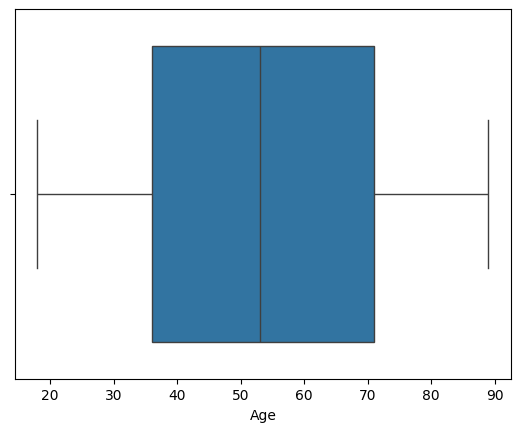

In [ ]:
import seaborn as sns
# 2. Outlier Detection and Removal
# Visualize and detect outliers
# (Use plots such as box plots or scatter plots)
sns.boxplot(x=data['Age'])

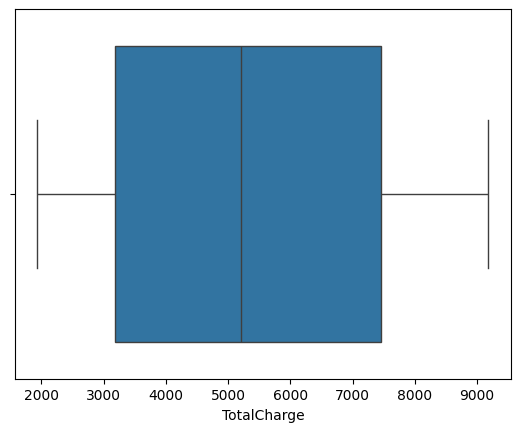

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize and detect outliers
sns.boxplot(x=data['TotalCharge'])
plt.xlabel('TotalCharge')
plt.show()


###Little to no changes will be made to the dataset as it appears to be in good shape for the selected variables.

# **C2.**

Statistics:

The dependent variable in this analysis is 'TotalCharge,' which represents the amount charged to the patient daily during their hospitalization. Here are the summary statistics for 'TotalCharge':

- Count: 10,000
- Mean: $5,312.17
- Standard Deviation: $2,180.39
- Minimum: $1,938.31
- 25th Percentile: $3,179.37
- Median (50th Percentile): $5,213.95
- 75th Percentile: $7,459.70
- Maximum: $9,180.73

Now, let's describe the independent variables:

1. Age:
   - Count: 10,000
   - Mean: 53.51
   - Standard Deviation: 20.64
   - Minimum: 18
   - 25th Percentile: 36
   - Median: 53
   - 75th Percentile: 71
   - Maximum: 89

2. Gender:
   - Count: 10,000
   - Unique values: 3
   - Top: Female
   - Frequency of top value: 5018

3. HighBlood:
   - Count: 10,000
   - Unique values: 2
   - Top: No
   - Frequency of top value: 5910

4. Diabetes:
   - Count: 10,000
   - Unique values: 2
   - Top: No
   - Frequency of top value: 7262

5. Overweight:
   - Count: 10,000
   - Unique values: 2
   - Top: Yes
   - Frequency of top value: 7094

---



---

**Screenshot has been submitted**

In [ ]:
# Summary Statistics for Dependent Variable 'TotalCharge'
dependent_var_stats = data['TotalCharge'].describe()
print("\nSummary Statistics for Dependent Variable 'TotalCharge':")
print(dependent_var_stats)

# Summary Statistics for Independent Variables
independent_vars_stats = data[['Age', 'Gender', 'HighBlood', 'Diabetes', 'Overweight']].describe(include='all')
print("\nSummary Statistics for Independent Variables:")
print(independent_vars_stats)



Summary Statistics for Dependent Variable 'TotalCharge':
count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64

Summary Statistics for Independent Variables:
                 Age  Gender HighBlood Diabetes Overweight
count   10000.000000   10000     10000    10000      10000
unique           NaN       3         2        2          2
top              NaN  Female        No       No        Yes
freq             NaN    5018      5910     7262       7094
mean       53.511700     NaN       NaN      NaN        NaN
std        20.638538     NaN       NaN      NaN        NaN
min        18.000000     NaN       NaN      NaN        NaN
25%        36.000000     NaN       NaN      NaN        NaN
50%        53.000000     NaN       NaN      NaN        NaN
75%        71.000000     NaN       NaN      NaN        NaN
max        89.000000     NaN       N


# **C3. Distribution (Univariate)**

# **Continuous Variables:**
## Age:
- **Count:** 10,000 patients.
- **Mean:** Approximately 53.51 years.
- **Standard Deviation:** About 20.64 years.
- **Minimum Age:** 18 years.
- **25th Percentile:** 36 years.
- **Median (50th Percentile):** 53 years.
- **75th Percentile:** 71 years.
- **Maximum Age:** 89 years.

## TotalCharge (Dependent Variable):
- **Count:** 10,000 patients.
- **Mean:** 5,312.17.
- **Standard Deviation:** 2,180.39.
- **Minimum TotalCharge:** 1,938.31.
- **25th Percentile:** 3,179.37.
- **Median (50th Percentile):** 5,213.95.
- **75th Percentile:** 7,459.70.
- **Maximum TotalCharge:** 9,180.73.

# **Categorical Variables**:

## Gender:
- **Distribution:**
  - Female: 5,018 patients.
  - Male: 4,768 patients.
  - Nonbinary: 214 patients.

## HighBlood:
- **Distribution:**
  - No: 5,910 patients.
  - Yes: 4,090 patients.

## Diabetes:
- **Distribution:**
  - No: 7,262 patients.
  - Yes: 2,738 patients.

## Overweight:
- **Distribution:**
  - Yes: 7,094 patients.
  - No: 2,906 patients.


---


---


# Univariate Statistics Summary

**Age:**
- The dataset comprises 10,000 patients.
- The average age is approximately 53.51 years.
- Age ranges from 18 to 89 years.
- The middle 50% of ages falls between 36 and 71 years.

**Gender:**
- Balanced gender distribution:
  - Female: 5,018 patients
  - Male: 4,768 patients
  - Nonbinary: 214 patients

**HighBlood:**
- About 40.9% of the dataset (4,090 out of 10,000) indicates individuals with high blood pressure ('Yes').

**Diabetes:**
- The majority of patients (7,262 out of 10,000) do not have diabetes.

**Overweight:**
- More patients are considered overweight (7,094 out of 10,000).

**TotalCharge (Dependent Variable):**
- The dataset exhibits a wide range of total charges for hospital visits.
- The average total charge is 5,312.17, with a standard deviation of 2,180.39.

In [ ]:
# Univariate Statistics for 'Age'
age_stats = data['Age'].describe()
print("\nUnivariate Statistics for Age:")
print(age_stats)

# Univariate Statistics for 'Gender'
gender_stats = data['Gender'].value_counts()
print("\nUnivariate Statistics for Gender:")
print(gender_stats)

# Univariate Statistics for 'HighBlood'
highblood_stats = data['HighBlood'].value_counts()
print("\nUnivariate Statistics for HighBlood:")
print(highblood_stats)

# Univariate Statistics for 'Diabetes'
diabetes_stats = data['Diabetes'].value_counts()
print("\nUnivariate Statistics for Diabetes:")
print(diabetes_stats)

# Univariate Statistics for 'Overweight'
overweight_stats = data['Overweight'].value_counts()
print("\nUnivariate Statistics for Overweight:")
print(overweight_stats)

# Univariate Statistics for 'TotalCharge' (dependent variable)
totalcharge_stats = data['TotalCharge'].describe()
print("\nUnivariate Statistics for TotalCharge:")
print(totalcharge_stats)



Univariate Statistics for Age:
count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

Univariate Statistics for Gender:
Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

Univariate Statistics for HighBlood:
No     5910
Yes    4090
Name: HighBlood, dtype: int64

Univariate Statistics for Diabetes:
No     7262
Yes    2738
Name: Diabetes, dtype: int64

Univariate Statistics for Overweight:
Yes    7094
No     2906
Name: Overweight, dtype: int64

Univariate Statistics for TotalCharge:
count    10000.000000
mean      5312.172769
std       2180.393838
min       1938.312067
25%       3179.374015
50%       5213.952000
75%       7459.699750
max       9180.728000
Name: TotalCharge, dtype: float64


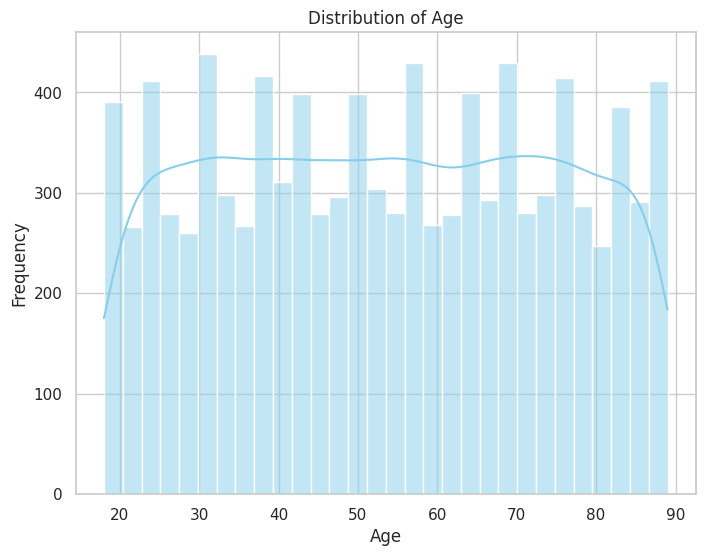

<ipython-input-7-4da7a6ce01d9>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette='pastel')


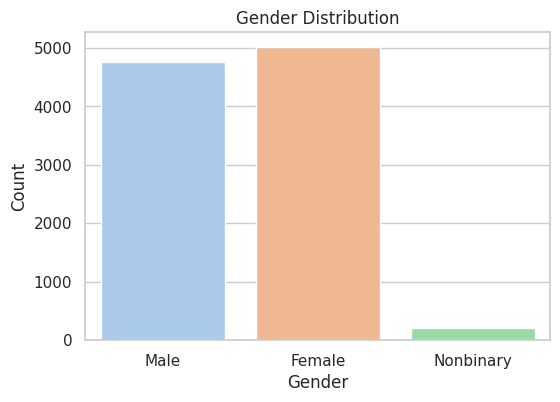

<ipython-input-7-4da7a6ce01d9>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HighBlood', data=data, palette='muted')


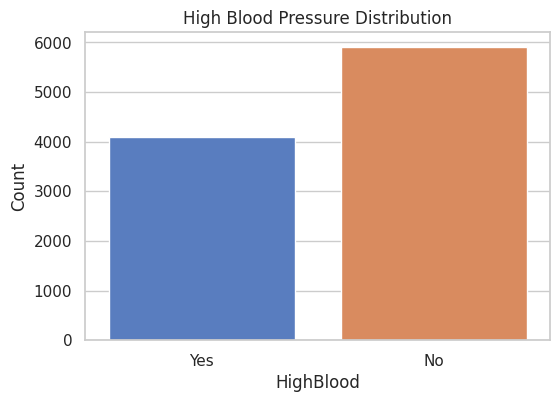

<ipython-input-7-4da7a6ce01d9>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diabetes', data=data, palette='dark')


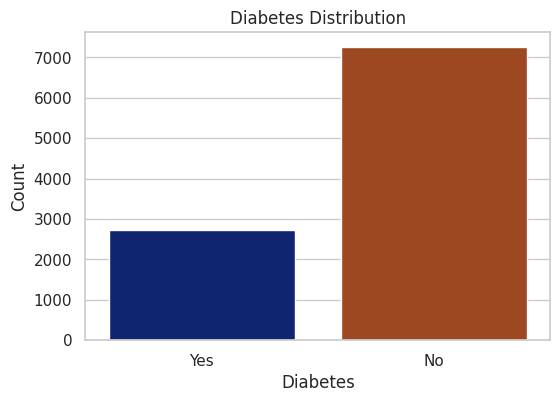

<ipython-input-7-4da7a6ce01d9>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Overweight', data=data, palette='bright')


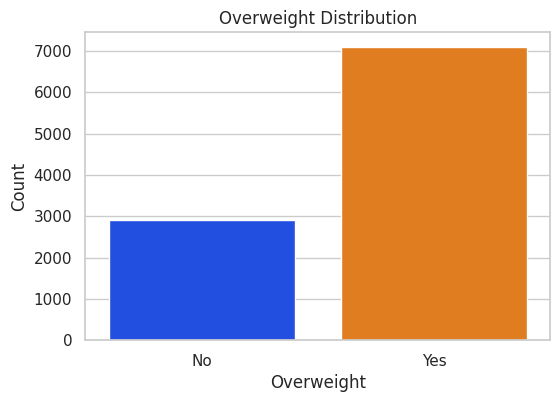

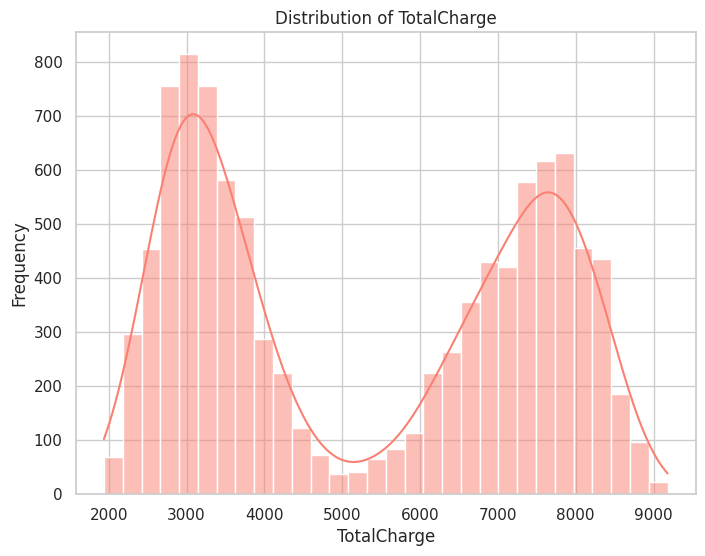

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for visualizations
sns.set(style="whitegrid")

# Univariate Statistics for Age
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Univariate Statistics for Gender
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Univariate Statistics for HighBlood
plt.figure(figsize=(6, 4))
sns.countplot(x='HighBlood', data=data, palette='muted')
plt.title('High Blood Pressure Distribution')
plt.xlabel('HighBlood')
plt.ylabel('Count')
plt.show()

# Univariate Statistics for Diabetes
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes', data=data, palette='dark')
plt.title('Diabetes Distribution')
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.show()

# Univariate Statistics for Overweight
plt.figure(figsize=(6, 4))
sns.countplot(x='Overweight', data=data, palette='bright')
plt.title('Overweight Distribution')
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.show()

# Univariate Statistics for TotalCharge
plt.figure(figsize=(8, 6))
sns.histplot(data['TotalCharge'], bins=30, kde=True, color='salmon')
plt.title('Distribution of TotalCharge')
plt.xlabel('TotalCharge')
plt.ylabel('Frequency')
plt.show()


# **Distribution (Bivariate):**

### Correlation Matrix for Age and TotalCharge:
- Age and TotalCharge have a correlation coefficient of approximately 0.017.
- The correlation is very close to zero, suggesting a weak linear relationship between age and total charges.

### Average TotalCharge by Gender:
- Female patients have an average TotalCharge of 5,298.17.
- Male patients have an average TotalCharge of 5,323.02.
- Nonbinary patients have the highest average TotalCharge of 5,399.01.
- The differences between genders in average TotalCharge are relatively small.

### Average TotalCharge by HighBlood:
- **Patients with High Blood Pressure (Yes) have an average TotalCharge of 5,364.35.**
- **Patients without High Blood Pressure (No) have a slightly lower average TotalCharge of 5,276.06.**
- The presence of High Blood Pressure appears to be associated with a slightly higher average TotalCharge.

### Average TotalCharge by Diabetes:
- **Patients with Diabetes (Yes) have an average TotalCharge of 5,353.09.**
- **Patients without Diabetes (No) have a slightly lower average TotalCharge of 5,296.74.**
- Diabetes is associated with a slightly higher average TotalCharge.

### Average TotalCharge by Overweight:
- **Non-overweight patients (No) have an average TotalCharge of 5,355.72.**
- **Overweight patients (Yes) have a slightly lower average TotalCharge of 5,294.34.**
- Overweight status doesn't show a strong association with TotalCharge.


In [ ]:
# Bivariate Statistics for Continuous-Continuous Relationship
correlation_matrix = data[['Age', 'TotalCharge']].corr()
print("Correlation Matrix for Age and TotalCharge:")
print(correlation_matrix)

# Bivariate Statistics for Categorical-Continuous Relationship
average_charge_by_gender = data.groupby('Gender')['TotalCharge'].mean()
print("\nAverage TotalCharge by Gender:")
print(average_charge_by_gender)

average_charge_by_highblood = data.groupby('HighBlood')['TotalCharge'].mean()
print("\nAverage TotalCharge by HighBlood:")
print(average_charge_by_highblood)

average_charge_by_diabetes = data.groupby('Diabetes')['TotalCharge'].mean()
print("\nAverage TotalCharge by Diabetes:")
print(average_charge_by_diabetes)

average_charge_by_overweight = data.groupby('Overweight')['TotalCharge'].mean()
print("\nAverage TotalCharge by Overweight:")
print(average_charge_by_overweight)


Correlation Matrix for Age and TotalCharge:
                  Age  TotalCharge
Age          1.000000     0.016876
TotalCharge  0.016876     1.000000

Average TotalCharge by Gender:
Gender
Female       5298.165530
Male         5323.017004
Nonbinary    5399.009269
Name: TotalCharge, dtype: float64

Average TotalCharge by HighBlood:
HighBlood
No     5276.061093
Yes    5364.353699
Name: TotalCharge, dtype: float64

Average TotalCharge by Diabetes:
Diabetes
No     5296.744317
Yes    5353.093665
Name: TotalCharge, dtype: float64

Average TotalCharge by Overweight:
Overweight
No     5355.715566
Yes    5294.335812
Name: TotalCharge, dtype: float64


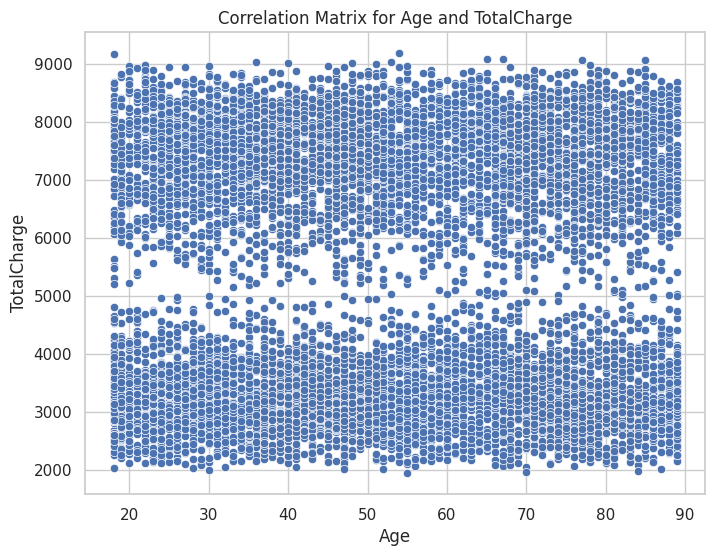

In [ ]:
# Correlation Matrix for Age and TotalCharge:
correlation_matrix = data[['Age', 'TotalCharge']].corr()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Age'], y=data['TotalCharge'])
plt.xlabel('Age')
plt.ylabel('TotalCharge')
plt.title('Correlation Matrix for Age and TotalCharge')
plt.show()


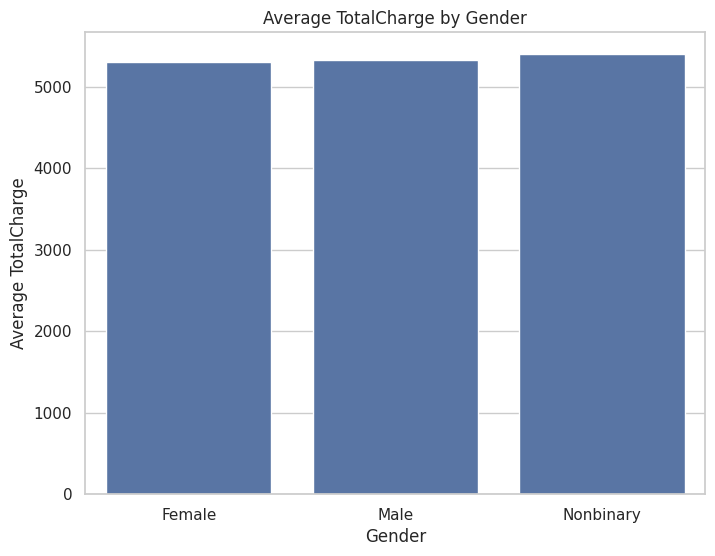

In [ ]:
# Average TotalCharge by Gender:
average_charge_by_gender = data.groupby('Gender')['TotalCharge'].mean().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_charge_by_gender.index, y=average_charge_by_gender.values)
plt.title('Average TotalCharge by Gender')
plt.xlabel('Gender')
plt.ylabel('Average TotalCharge')
plt.show()


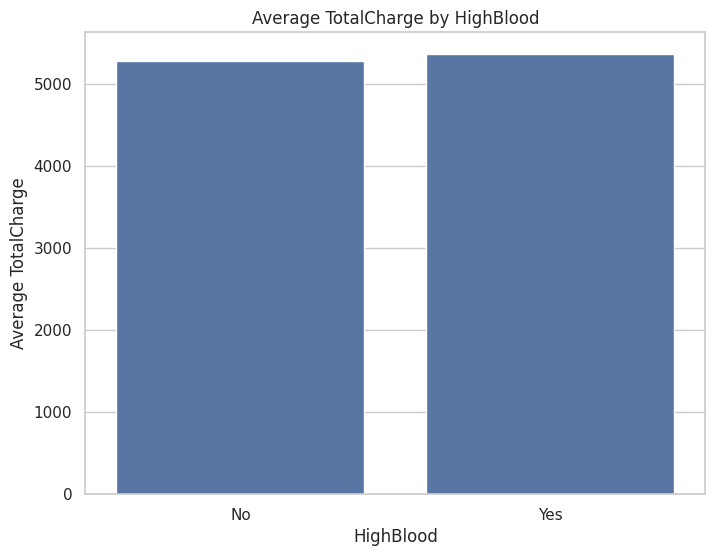

In [ ]:
# Average TotalCharge by HighBlood:
average_charge_by_highblood = data.groupby('HighBlood')['TotalCharge'].mean().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_charge_by_highblood.index, y=average_charge_by_highblood.values)
plt.title('Average TotalCharge by HighBlood')
plt.xlabel('HighBlood')
plt.ylabel('Average TotalCharge')
plt.show()


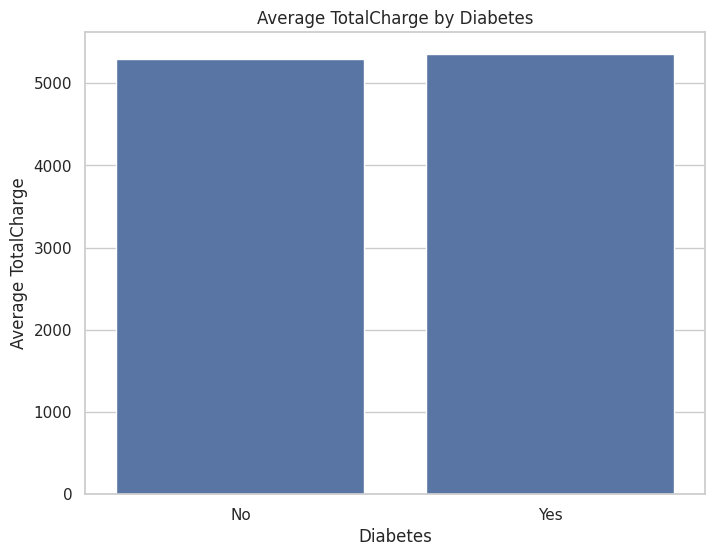

In [ ]:
# Average TotalCharge by Diabetes:
average_charge_by_diabetes = data.groupby('Diabetes')['TotalCharge'].mean().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_charge_by_diabetes.index, y=average_charge_by_diabetes.values)
plt.title('Average TotalCharge by Diabetes')
plt.xlabel('Diabetes')
plt.ylabel('Average TotalCharge')
plt.show()


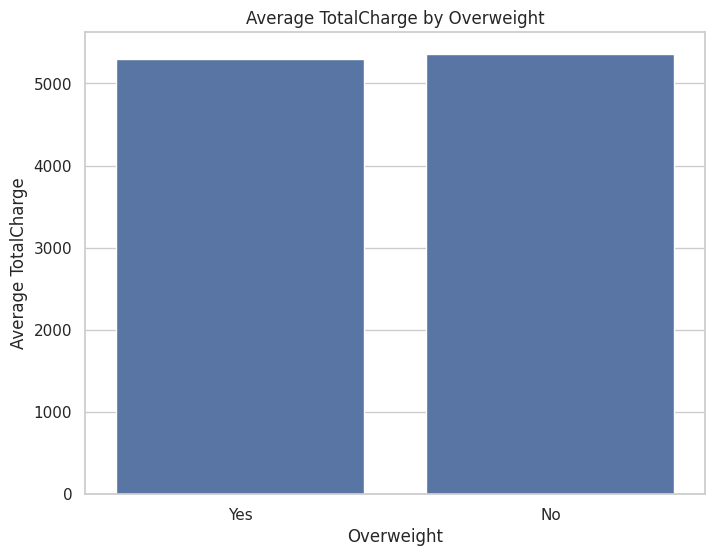

In [ ]:
# Average TotalCharge by Overweight:
average_charge_by_overweight = data.groupby('Overweight')['TotalCharge'].mean().sort_values()

plt.figure(figsize=(8, 6))
sns.barplot(x=average_charge_by_overweight.index, y=average_charge_by_overweight.values)
plt.title('Average TotalCharge by Overweight')
plt.xlabel('Overweight')
plt.ylabel('Average TotalCharge')
plt.show()

# **C4.**

**Data Transformation Goals and Steps:**

1. **Handling Categorical Variables:**
   - Identify categorical variables.
   - Convert them into a numerical format using one-hot encoding.

In [ ]:
# 3. Handling Categorical Variables
# Identify categorical variables
categorical_columns = ['Gender', 'HighBlood', 'Diabetes',
                        'Overweight']

# Use one-hot encoding to convert them into numerical format
data_encoded = pd.get_dummies(data[categorical_columns], columns=categorical_columns)
print(data_encoded)

      Gender_Female  Gender_Male  Gender_Nonbinary  HighBlood_No  \
0                 0            1                 0             0   
1                 1            0                 0             0   
2                 1            0                 0             0   
3                 0            1                 0             1   
4                 1            0                 0             1   
...             ...          ...               ...           ...   
9995              0            1                 0             0   
9996              0            1                 0             0   
9997              1            0                 0             0   
9998              0            1                 0             1   
9999              1            0                 0             1   

      HighBlood_Yes  Diabetes_No  Diabetes_Yes  Overweight_No  Overweight_Yes  
0                 1            0             1              1               0  
1                 1    

# **C5.**

In [ ]:
# Drop columns
columns_to_drop = ['Gender_Nonbinary', 'HighBlood_No', 'Diabetes_No', 'Overweight_No']

# Check if each column exists in data_encoded.columns and drop it if present
for col in columns_to_drop:
    if col in data_encoded.columns:
        data_encoded.drop(col, axis=1, inplace=True)

# Create a new DataFrame to store prepared data
prepared_data = data_encoded.copy()

# Add 'Age' & 'TotalCharge' column to prepared_data using merge
prepared_data = prepared_data.merge(data[['Age', 'TotalCharge']], left_index=True, right_index=True)

print(prepared_data)

# Save the prepared data to a CSV file
prepared_data.to_csv('/content/prepared_data.csv', index=False)

      Gender_Female  Gender_Male  HighBlood_Yes  Diabetes_Yes  Overweight_Yes  \
0                 0            1              1             1               0   
1                 1            0              1             0               1   
2                 1            0              1             1               1   
3                 0            1              0             0               0   
4                 1            0              0             0               0   
...             ...          ...            ...           ...             ...   
9995              0            1              1             0               0   
9996              0            1              1             1               1   
9997              1            0              1             0               1   
9998              0            1              0             0               1   
9999              1            0              0             0               1   

      Age  TotalCharge  
0 

# **D1.**

Initial Linear Regression Model results:

- Limited explanatory power (R-squared = 0.001) suggests the model explains a small portion of 'TotalCharge' variation.

- Age shows no significant impact on 'TotalCharge' (p-value = 0.095).

- 'HighBlood_Yes' is significant (p-value = 0.044), indicating higher charges for individuals with high blood pressure.

- Other variables ('Gender_Female', 'Gender_Male', 'Diabetes_Yes', 'Overweight_Yes') lack significant effects on 'TotalCharge'.

In [ ]:
import statsmodels.api as sm

# Define the dependent variable (TotalCharge) and independent variables
dependent_variable = 'TotalCharge'

# Adjust the list of independent variables after one-hot encoding
independent_variables = ['Age',
    'Gender_Female', 'Gender_Male', 'HighBlood_Yes',
    'Diabetes_Yes', 'Overweight_Yes'
]

# Create the design matrix X and add a constant term for the intercept
X = sm.add_constant(prepared_data[independent_variables])

# Create the dependent variable Y
Y = prepared_data[dependent_variable]

# Fit the model
model_updated = sm.OLS(Y, X).fit()

# Print the summary
print(model_updated.summary())


                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.745
Date:                Tue, 26 Mar 2024   Prob (F-statistic):              0.106
Time:                        03:52:56   Log-Likelihood:                -91056.
No. Observations:               10000   AIC:                         1.821e+05
Df Residuals:                    9993   BIC:                         1.822e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5293.8432    165.023     32.

# **D2.**

To enhance the model's relevance to the research question of understanding medical conditions and demographics' impact on hospital charges, a statistically based feature selection procedure is applied (Backward Stepwise Elimination).

The variables that were removed from the model due to their non-significant p-values (greater than 0.05) were 'Age', 'Gender_Female', 'Gender_Male', 'Diabetes_Yes', and 'Overweight_Yes'. It aligns with this goal. This approach simplifies the model, maintains relevance, and avoids potential multicollinearity issues.



---



---

# **D3.**

Reduced model:

- The model's R-squared and Adjusted R-squared values are both 0.000, indicating no explanatory power.

- The F-statistic is 3.965 with a p-value of 0.0465, suggesting overall statistical significance at a 0.05 significance level.

- Only the variable 'HighBlood_Yes' has a statistically significant impact on 'TotalCharge' (p-value = 0.046).

- The intercept coefficient is 5276.0611, representing the expected 'TotalCharge' when all predictors are zero.

In [ ]:
# Copy the initial model to model_reduced
model_reduced = model_updated

# Perform backward stepwise elimination based on p-values
while True:
    # Check the p-values of the coefficients in model_reduced
    p_values = model_reduced.pvalues.drop('const')  # Drop the constant term

    # Find the variable with the highest p-value
    max_p_value = p_values.max()
    if max_p_value > 0.05:
        # Remove the variable with the highest p-value if it exists in the list
        variable_to_remove = p_values.idxmax()
        if variable_to_remove in independent_variables:
            independent_variables.remove(variable_to_remove)

            # Update the design matrix X
            X = sm.add_constant(prepared_data[independent_variables])

            # Refit the model and store it in model_reduced
            model_reduced = sm.OLS(Y, X).fit()
        else:
            break  # Stop if all variables have been removed from the list
    else:
        break  # Stop if all remaining variables have p-values below the significance level


print("\nReduced Model Summary:")
print(model_reduced.summary())


Reduced Model Summary:
                            OLS Regression Results                            
Dep. Variable:            TotalCharge   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.965
Date:                Tue, 26 Mar 2024   Prob (F-statistic):             0.0465
Time:                        02:18:33   Log-Likelihood:                -91060.
No. Observations:               10000   AIC:                         1.821e+05
Df Residuals:                    9998   BIC:                         1.821e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5276.06

# **E1.**

The adjusted R-squared values for both the Reduced Model and the Updated Model are extremely low:

- Reduced Model: 0.0003
- Updated Model: 0.0004

These values indicate that both models explain very little of the variation in the dependent variable (TotalCharge). They have limited predictive power and do not effectively capture the factors influencing TotalCharge.

In [ ]:
# Get the adjusted R-squared from the model summary for the reduced model
adj_r_squared_reduced = model_reduced.rsquared_adj

# Get the adjusted R-squared from the model summary for the updated model
adj_r_squared_updated = model_updated.rsquared_adj

# Print the adjusted R-squared for both models
print(f"Adjusted R-squared for the Reduced Model: {adj_r_squared_reduced}")
print(f"Adjusted R-squared for the Updated Model: {adj_r_squared_updated}")


Adjusted R-squared for the Reduced Model: 0.0002964190564677116
Adjusted R-squared for the Updated Model: 0.00044676602212034844


# **E2.**

**Residual Plot:**
The vertical lines in the residual plot indicate the inclusion of binary variables in the model. These lines correspond to the discrete categories represented by these variables, influencing the model's predictions. This pattern should be noted when assessing the model's performance and drawing conclusions from its predictions.



---



---

The **Residual Standard Error** The reduced model's Residual Standard Error (RSE) is about 2180.07. This measures how much the model's predicted TotalCharge values differ, on average, from the actual values in the data. A lower RSE means the model's predictions are closer to the actual values, showing better accuracy in predicting TotalCharge based on the variables included in the reduced model.



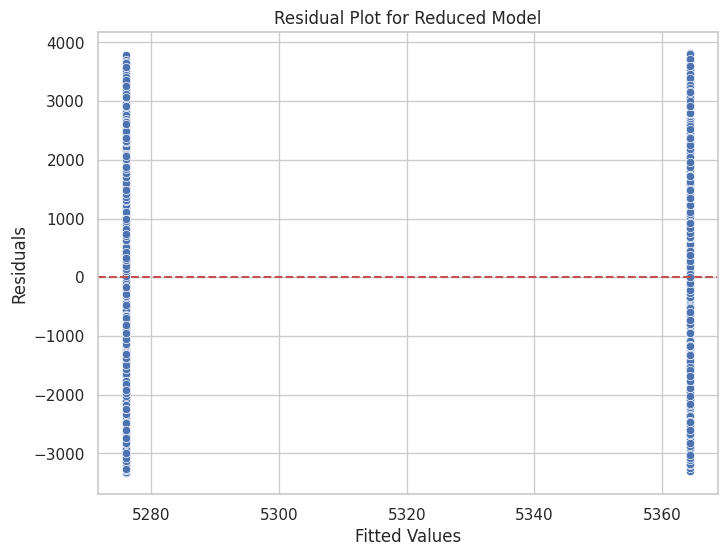

In [ ]:
# Residual plot
# Calculate residuals for reduced model
residuals_reduced = model_reduced.resid

# Create a residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=model_reduced.fittedvalues, y=residuals_reduced)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Reduced Model')
plt.show()

In [ ]:
# Residual Standard Error (RSE) from the summary of model_reduced
rse_reduced = model_reduced.mse_resid ** 0.5

# Print the Residual Standard Error (RSE) for model_reduced
print(f"Residual Standard Error (RSE) for model_reduced: {rse_reduced}")

Residual Standard Error (RSE) for model_reduced: 2180.07065871799


### **E3.** A Python file has been attached to the submission.

# **F1.**

1. **Regression Equation for the Reduced Model**:
   - The reduced linear regression equation is: TotalCharge = 5276.0611 + 88.2926 * HighBlood_Yes

   The reduced linear regression equation predicts total charges based on whether the patient has high blood pressure, with an intercept of 5276.0611 and an additional 88.2926 for each instance of high blood pressure.

2. **Interpretation of Coefficients**:
   - The coefficient for 'HighBlood_Yes' (88.2926) indicates an increase in total charges for patients with high blood pressure.
   
3. **Statistical and Practical Significance**:
   - The reduced model's coefficient for 'HighBlood_Yes' is statistically significant (p-value = 0.046), suggesting an impact on total charges.
   - However, the model's overall explanatory power (Adjusted R-squared = 0.000296) is very low, indicating limited practical significance.

4. **Limitations**:
   - The analysis overlooks other potential influential factors not included in the model, such as age, gender, diabetes status, and overweight status.
   - The low adjusted R-squared value implies that the model does not explain much of the variation in total charges.

# **F2.**

**Recommended Project Actions:**


- Consider revisiting the model to include additional relevant variables that might contribute to explaining total charges more effectively.

- Explore other regression techniques or machine learning algorithms that may capture the complex relationships within the data more accurately.

# **H.**  N/A

# **I.**

ZACH. (2021, November 16). "Multiple linear regression is a statistical method we can use to understand the relationship between multiple predictor variables and a response variable." Retrieved from https://www.statology.org/multiple-linear-regression-assumptions/